In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os

In [4]:
data=pd.read_csv("IRIS (2).csv")

In [3]:
data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [4]:
data.tail()

,Unnamed: 0,sepal length,sepal width,petal length,petal width
145,145,6.7,3.0,5.2,2.3
146,146,6.3,2.5,5.0,1.9
147,147,6.5,3.0,5.2,2.0
148,148,6.2,3.4,5.4,2.3
149,149,5.9,3.0,5.1,1.8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    150 non-null    int64  
 1   sepal length  150 non-null    float64
 2   sepal width   150 non-null    float64
 3   petal length  150 non-null    float64
 4   petal width   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
data.isnull().values.any()

False

In [9]:
data.isnull().sum().sum()

0

In [10]:
data.shape

(150, 5)

In [11]:
data.size

750

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150.0,74.500000,43.445368,0.0,37.25,74.50,111.75,149.0
sepal length,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
sepal width,150.0,3.057333,0.435866,2.0,2.80,3.00,3.30,4.4
petal length,150.0,3.758000,1.765298,1.0,1.60,4.35,5.10,6.9
petal width,150.0,1.199333,0.762238,0.1,0.30,1.30,1.80,2.5


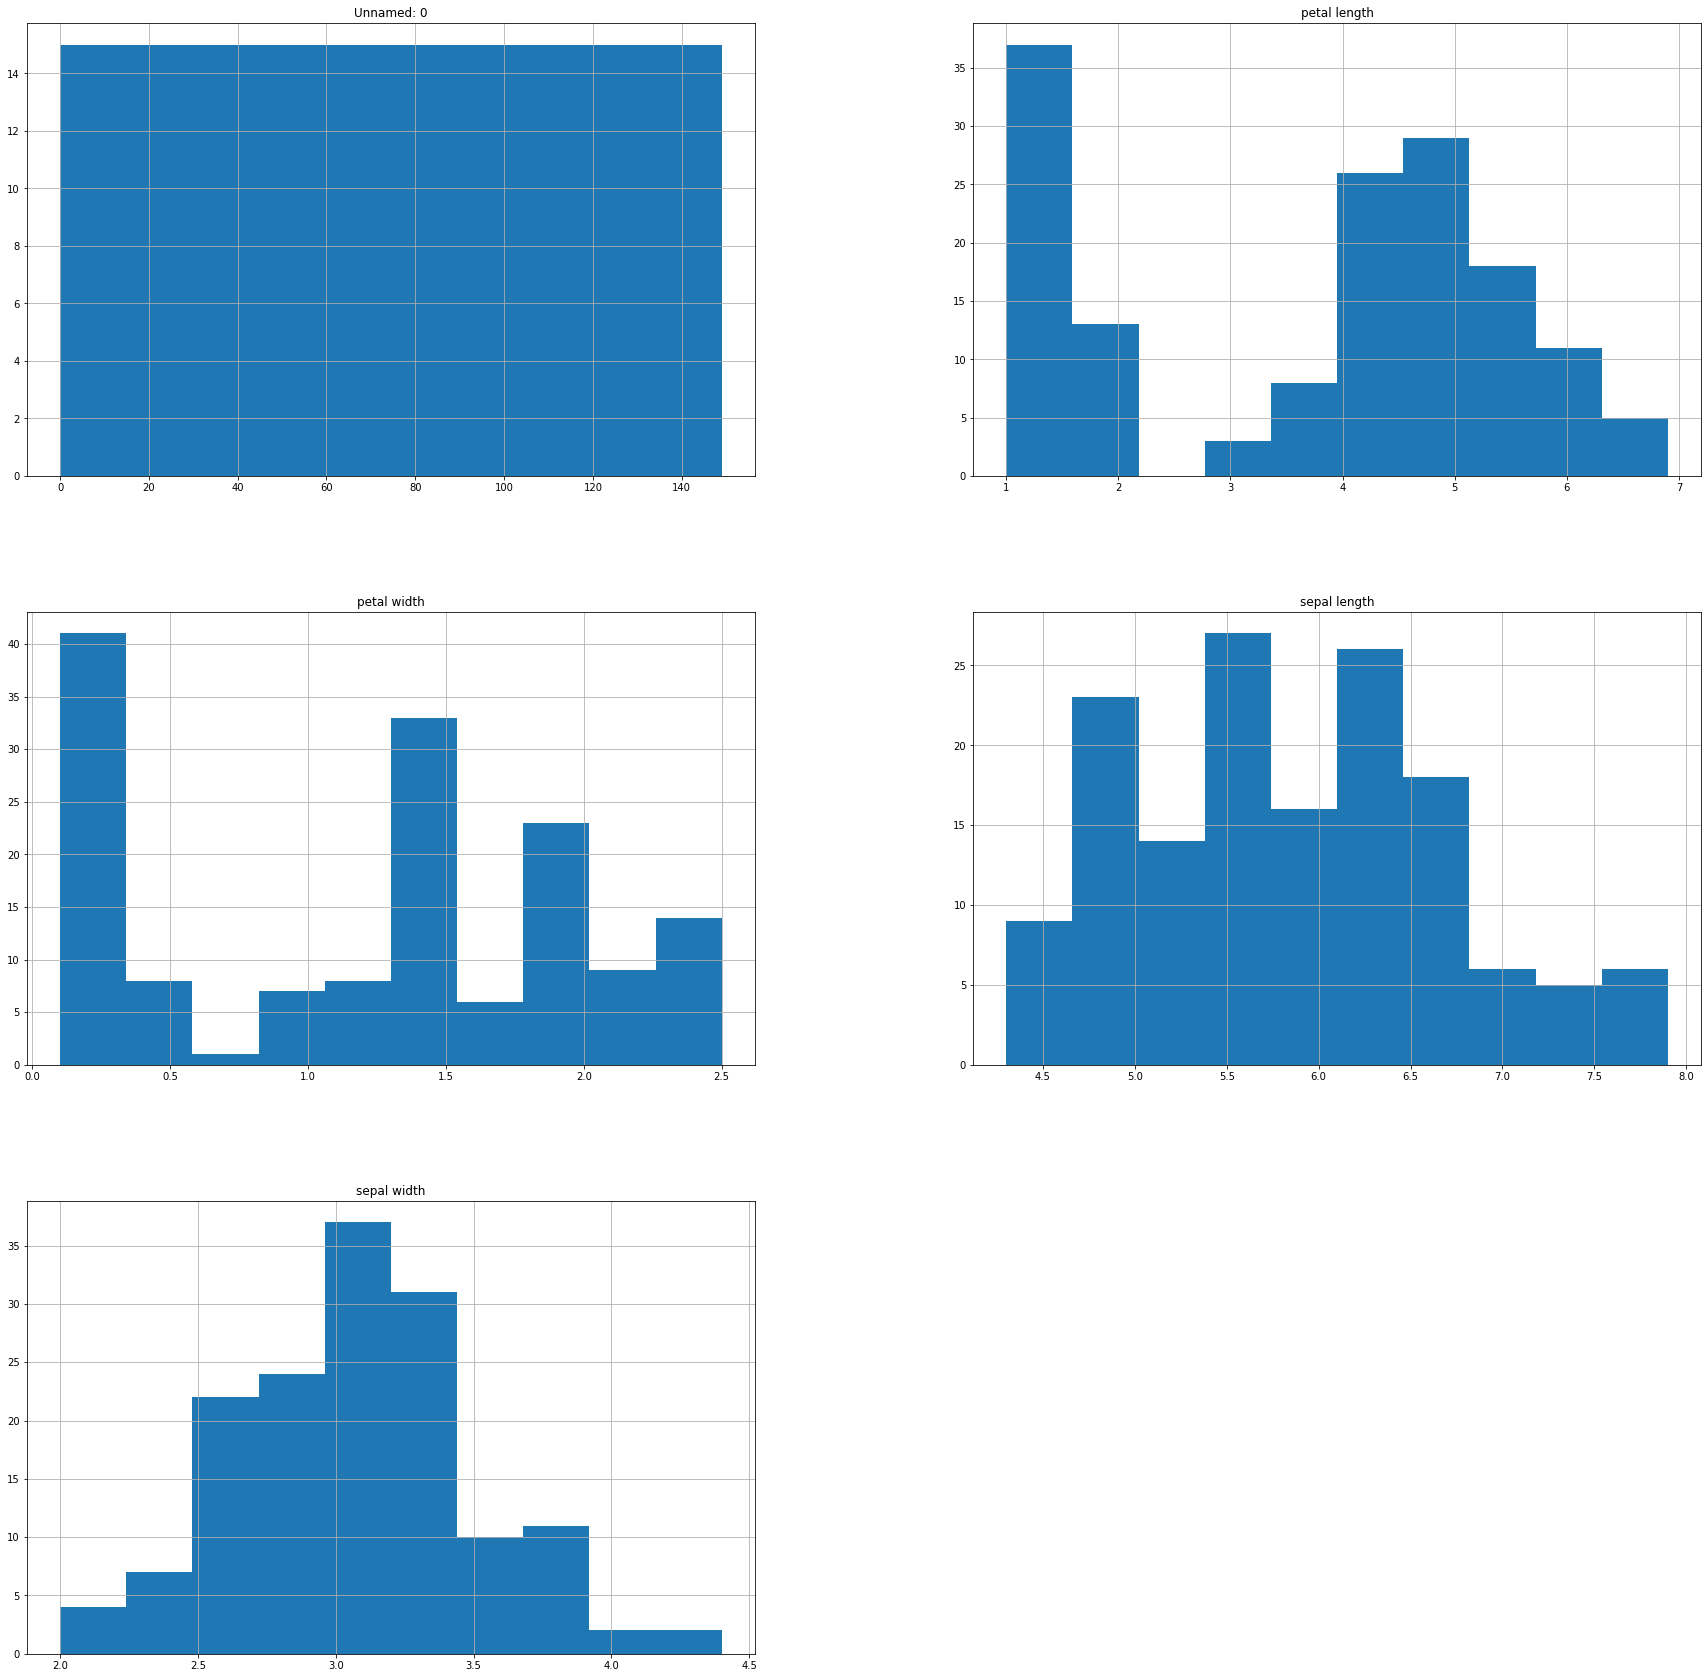

In [16]:
data.hist(figsize=(30,30));

In [17]:
data.skew()

Unnamed: 0      0.000000
sepal length    0.314911
sepal width     0.318966
petal length   -0.274884
petal width    -0.102967
dtype: float64

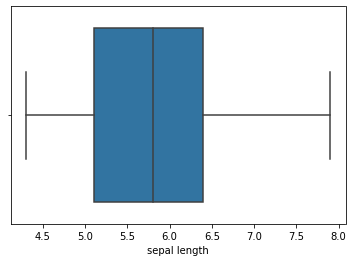

In [19]:
sns.boxplot(data['sepal length'])

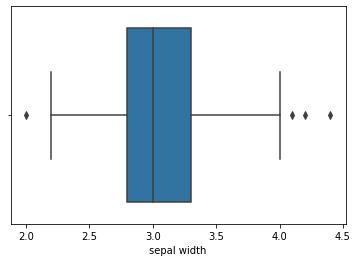

In [20]:
sns.boxplot(data['sepal width'])

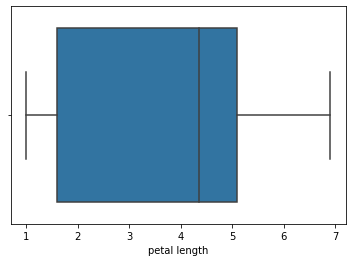

In [21]:
sns.boxplot(data['petal length'])

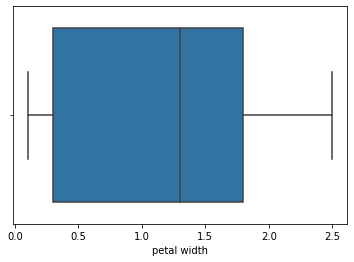

In [22]:
sns.boxplot(data['petal width'])

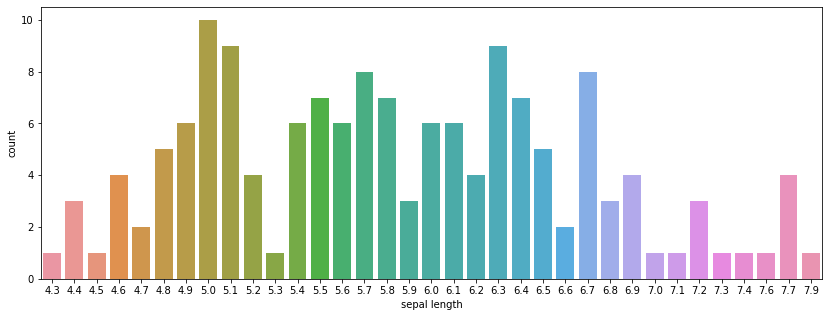

In [27]:
plt.figure(figsize=(14, 5))
sns.countplot(data['sepal length'],data=data)

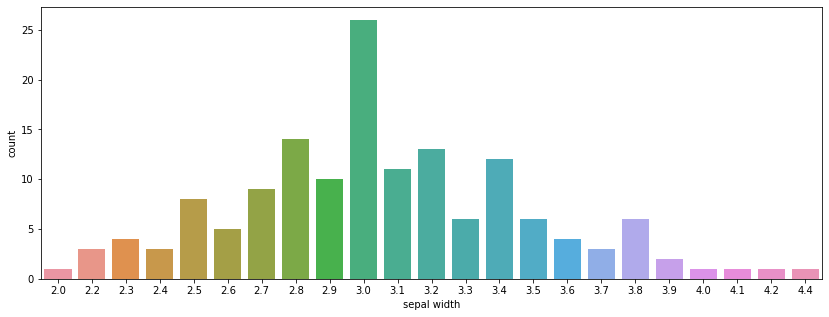

In [28]:
plt.figure(figsize=(14, 5))
sns.countplot(data['sepal width'],data=data)

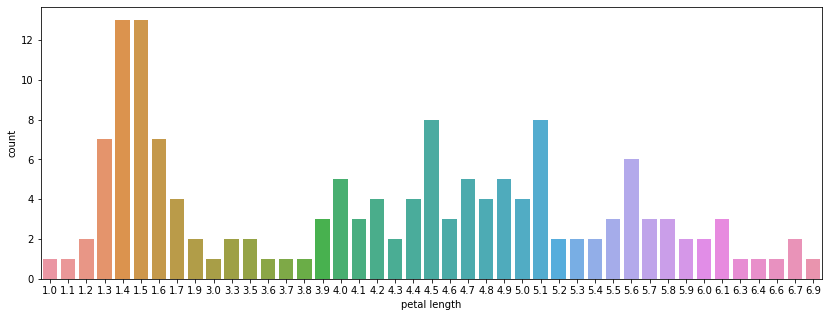

In [29]:
plt.figure(figsize=(14, 5))
sns.countplot(data['petal length'],data=data)

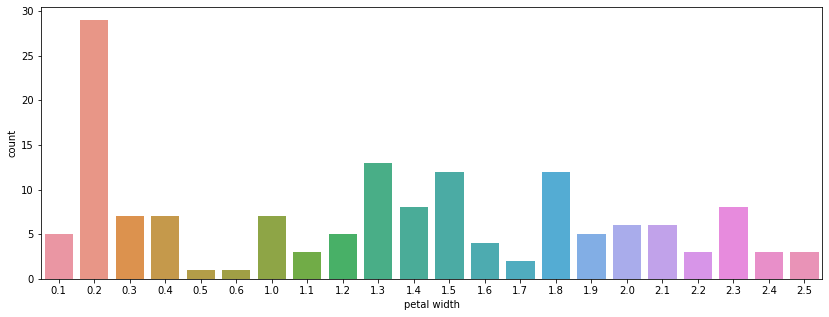

In [30]:
plt.figure(figsize=(14, 5))
sns.countplot(data['petal width'],data=data)

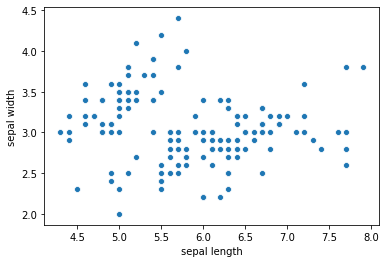

In [6]:
sns.scatterplot(data['sepal length'],data['sepal width'])

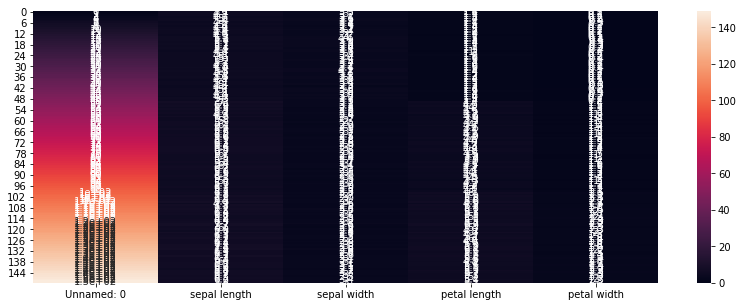

In [44]:
plt.figure(figsize=(14, 5))
sns.heatmap(data,annot=True)

In [37]:
a1=data.groupby('sepal length')['sepal width'].mean()
a1

sepal length
4.3    3.000000
4.4    3.033333
4.5    2.300000
4.6    3.325000
4.7    3.200000
4.8    3.180000
4.9    2.950000
5.0    3.120000
5.1    3.477778
5.2    3.425000
5.3    3.700000
5.4    3.550000
5.5    2.842857
5.6    2.816667
5.7    3.100000
5.8    2.885714
5.9    3.066667
6.0    2.733333
6.1    2.850000
6.2    2.825000
6.3    2.855556
6.4    2.957143
6.5    3.000000
6.6    2.950000
6.7    3.050000
6.8    3.000000
6.9    3.125000
7.0    3.200000
7.1    3.000000
7.2    3.266667
7.3    2.900000
7.4    2.800000
7.6    3.000000
7.7    3.050000
7.9    3.800000
Name: sepal width, dtype: float64

In [39]:
a2=data.groupby('sepal width')['sepal length'].mean()
a2

sepal width
2.0    5.000000
2.2    6.066667
2.3    5.325000
2.4    5.300000
2.5    5.762500
2.6    6.160000
2.7    5.855556
2.8    6.335714
2.9    6.060000
3.0    6.015385
3.1    6.036364
3.2    5.884615
3.3    6.016667
3.4    5.316667
3.5    5.150000
3.6    5.425000
3.7    5.266667
3.8    6.100000
3.9    5.400000
4.0    5.800000
4.1    5.200000
4.2    5.500000
4.4    5.700000
Name: sepal length, dtype: float64

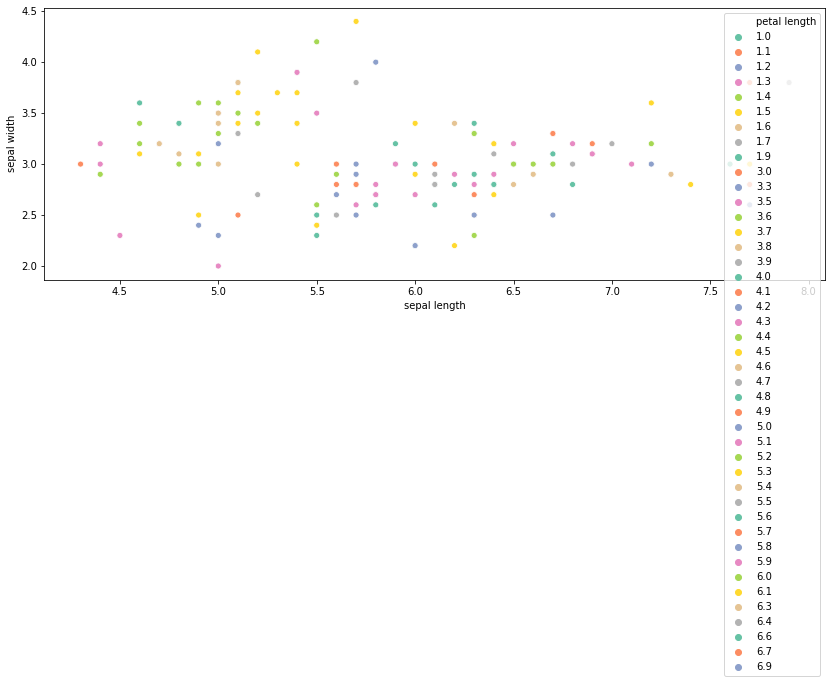

In [40]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x=data["sepal length"],y=data["sepal width"],hue=data["petal length"],sizes=(100,200),palette="Set2",legend="full");

In [42]:
corr=data.corr()
corr

,Unnamed: 0,sepal length,sepal width,petal length,petal width
Unnamed: 0,1.000000,0.716676,-0.402301,0.882637,0.900027
sepal length,0.716676,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.882637,0.871754,-0.428440,1.000000,0.962865
petal width,0.900027,0.817941,-0.366126,0.962865,1.000000


In [47]:
Numeric=data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index.tolist()
Numeric

['Unnamed: 0', 'sepal length', 'sepal width', 'petal length', 'petal width']

In [49]:
for i in range(len(Numeric)):
    print("Five point summary :" , Numeric[i] )
    print("Min : " , np.percentile(data[Numeric[i]],0))
    Q3=np.percentile(data[Numeric[i]],75)
    Q1=np.percentile(data[Numeric[i]],25)
    IQR=Q3-Q1
    UL = Q3 +1.5*IQR
    LL = Q1 - 1.5*IQR
    print("L1 :", LL)
    print("Q1 : ", np.percentile(data[Numeric[i]], 25))
    print("Q2 : ", np.percentile(data[Numeric[i]], 50))
    print("Q3 : ", np.percentile(data[Numeric[i]], 75))
    print("Max : ", np.percentile(data[Numeric[i]],100))
    print("UL : ", UL)
    print("******************************")

Five point summary : Unnamed: 0
Min :  0.0
L1 : -74.5
Q1 :  37.25
Q2 :  74.5
Q3 :  111.75
Max :  149.0
UL :  223.5
******************************
Five point summary : sepal length
Min :  4.3
L1 : 3.1499999999999986
Q1 :  5.1
Q2 :  5.8
Q3 :  6.4
Max :  7.9
UL :  8.350000000000001
******************************
Five point summary : sepal width
Min :  2.0
L1 : 2.05
Q1 :  2.8
Q2 :  3.0
Q3 :  3.3
Max :  4.4
UL :  4.05
******************************
Five point summary : petal length
Min :  1.0
L1 : -3.649999999999999
Q1 :  1.6
Q2 :  4.35
Q3 :  5.1
Max :  6.9
UL :  10.349999999999998
******************************
Five point summary : petal width
Min :  0.1
L1 : -1.95
Q1 :  0.3
Q2 :  1.3
Q3 :  1.8
Max :  2.5
UL :  4.05
******************************


Q1 = np.percentile(data['charges'],25)
Q3 = np.percentile(Ins['charges'],75)
IQR = Q3-Q1
UL = Q3+1.5*IQR
LL = Q1 -1.5*IQR
UL
Outliers = Ins[Ins['charges']>UL]['charges']
#Outliers = Ins[(Ins['charges']<LL) | (Ins['charges']>UL)]['charges']
Outliers.shape

In [ ]:
pd.crosstab(mydata['Product'],mydata['Gender'])   ####

In [ ]:
pd.pivot_table(mydata,index=['Product','Gender'],columns=['MaritalStatus'],aggfunc=len)    ######

In [ ]:
pd.pivot_table(mydata,'Miles',index=['Product','Gender'],columns=['MaritalStatus'])        ############

In [ ]:
sns.distplot(mydata['sepal length']);

In [ ]:
sns.distplot(mydata['sepal width']);

In [ ]:
sns.distplot(mydata['petal length']);

In [ ]:
sns.distplot(mydata['petal width']);

In [ ]:
mydata.hist(by='Gender',column='Age');            #########